In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

import math
import cv2
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from keras.models import Model

Using TensorFlow backend.
C:\Users\mb207\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mb207\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mb207\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mb207\Anaconda3\envs\opencv\lib\sit

In [20]:
DATASET_NAME = 'Mango'

TRAIN_PATH = './dataset/Mango/DATA/Train/'

In [21]:
MODEL_DIR = 'model/' + DATASET_NAME
 
MODEL_SAVE_PATH = MODEL_DIR + '/ResNet_model.h5'

img_width, img_height = 224, 224
batch_size = 8
epochs = 10000000
learning_rate = 2e-5
momentum = 0.9
early_stop_count = 10

In [22]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
set_session(tf.Session(config=config))

In [23]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.5,
    validation_split=0.2
    )

In [24]:
train_generator = datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

num_train_samples = len(train_generator.filenames)
num_classes = len(train_generator.class_indices)
print('訓練資料的數量 => ', num_train_samples)
print('類別數量 => ', num_classes)
print('類別名稱、index => ', train_generator.class_indices)

Found 4905 images belonging to 3 classes.
訓練資料的數量 =>  4905
類別數量 =>  3
類別名稱、index =>  {'A': 0, 'B': 1, 'C': 2}


In [25]:
validation_generator = datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

num_validation_samples = len(validation_generator.filenames)
print('驗證資料的數量 => ', num_validation_samples)

Found 1225 images belonging to 3 classes.
驗證資料的數量 =>  1225


In [6]:
model_ResNet = applications.ResNet50(include_top= None,input_shape=(224,224,3),weights= 'imagenet')

C:\Users\mb207\Anaconda3\envs\opencv\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 5s 0us/step


In [9]:
model_ResNet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [14]:
x=model_ResNet.output
x=Flatten()(x)
x=Dense(4096, activation='relu')(x)
x=Dense(2048, activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(1024, activation='relu')(x)
preds=Dense(num_classes, activation='softmax')(x)

In [15]:
model=Model(inputs=model_ResNet.input,outputs=preds)

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
early_stopping = EarlyStopping(patience=early_stop_count)
checkpointer = ModelCheckpoint(MODEL_SAVE_PATH, verbose=1, save_best_only=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10000000
614/614 [==============================] - 260s 423ms/step - loss: 0.7591 - acc: 0.6517 - val_loss: 0.5251 - val_acc: 0.7739

Epoch 00001: val_loss improved from inf to 0.52512, saving model to model/Mango/ResNet_model.h5
Epoch 2/10000000
614/614 [==============================] - 247s 402ms/step - loss: 0.6245 - acc: 0.7209 - val_loss: 0.5326 - val_acc: 0.7478

Epoch 00002: val_loss did not improve from 0.52512
Epoch 3/10000000
614/614 [==============================] - 253s 412ms/step - loss: 0.5730 - acc: 0.7443 - val_loss: 0.5198 - val_acc: 0.7673

Epoch 00003: val_loss improved from 0.52512 to 0.51982, saving model to model/Mango/ResNet_model.h5
Epoch 4/10000000
614/614 [==============================] - 253s 412ms/step - loss: 0.5509 - acc: 0.7565 - val_loss: 0.5240 - val_acc: 0.7649

Epoch 00004: val_loss did not improve from 0.51982
Epoch 5/10000000
614/614 [=========

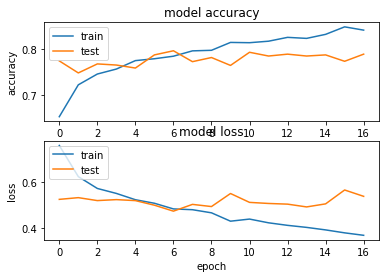

In [13]:
model.compile(optimizer=optimizers.Adam(lr=learning_rate),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
                    epochs=epochs,
                    callbacks=[early_stopping,checkpointer], 
                    validation_data=validation_generator)

model.save_weights(MODEL_SAVE_PATH)

print("[INFO] Best loss: {}".format(np.min(history.history['loss'])))
print("[INFO] Best acc: {}".format(np.max(history.history['acc'])))
print("[INFO] Best val_loss: {}".format(np.min(history.history['val_loss'])))
print("[INFO] Best val_acc: {}".format(np.max(history.history['val_acc'])))

plt.figure(1)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predict Data

In [14]:
import os
import pandas as pd

In [15]:
TESTDIR = './dataset/Mango/Test_Image/'

In [16]:
label = []
for v in train_generator.class_indices:label.append(v)

In [17]:
TrueLabel = pd.read_csv('./dataset/Mango/Test.csv')

In [18]:
TrueLabel

,image_id,label
0,07686.jpg,C
1,07687.jpg,B
2,07688.jpg,C
3,07689.jpg,A
4,07690.jpg,A
5,07691.jpg,A
6,07694.jpg,A
7,07695.jpg,A
8,07696.jpg,B
9,07697.jpg,A


In [19]:
true_label = []
predict_label = []
predict_result = []

In [20]:
for i in os.listdir(TESTDIR):
    print(i)
    image = load_img(TESTDIR + str(i), target_size=(224, 224))
    image = img_to_array(image)
    image = image / 255
    image = np.expand_dims(image, axis=0)
    predict = model.predict(image)
    predict = np.argmax(predict,axis=1)
    tl = TrueLabel.loc[TrueLabel['image_id']== str(i)]['label'].tolist()
    tl = tl[0].split('.')[0]
    pl = label[int(predict)]
    true_label.append(tl[0])
    predict_label.append(pl)
    if tl == pl:
        predict_result.append(1)
        print('True')
    else:
        predict_result.append(0)
        print('False')

07686.jpg
True
07687.jpg
True
07688.jpg
False
07689.jpg
True
07690.jpg
True
07691.jpg
True
07694.jpg
True
07695.jpg
True
07696.jpg
False
07697.jpg
False
07698.jpg
False
07699.jpg
True
07700.jpg
False
07701.jpg
False
07702.jpg
True
07703.jpg
True
07704.jpg
False
07705.jpg
True
07706.jpg
True
07707.jpg
False
07708.jpg
True
07710.jpg
True
07711.jpg
False
07712.jpg
True
07713.jpg
True
07715.jpg
True
07716.jpg
True
07718.jpg
False
07720.jpg
True
07722.jpg
False
07723.jpg
True
07724.jpg
True
07725.jpg
True
07728.jpg
True
07729.jpg
True
07730.jpg
True
07731.jpg
True
07732.jpg
True
07734.jpg
False
07735.jpg
False
07736.jpg
True
07737.jpg
True
07739.jpg
True
07740.jpg
True
07741.jpg
False
07742.jpg
False
07744.jpg
False
07745.jpg
True
07746.jpg
True
07747.jpg
True
07748.jpg
True
07749.jpg
True
07750.jpg
True
07751.jpg
True
07752.jpg
True
07753.jpg
True
07754.jpg
True
07755.jpg
True
07760.jpg
True
07762.jpg
True
07763.jpg
True
07764.jpg
True
07765.jpg
True
07766.jpg
True
07767.jpg
True
07768.jpg

In [21]:
df = pd.DataFrame(columns=['TrueLabel', 'PredictLabel', 'PredictResult'])
df['TrueLabel'] = true_label
df['PredictLabel'] = predict_label
df['PredictResult'] = predict_result

In [22]:
testAcc = len(df.loc[df['PredictResult']==1])/len(predict_result)

In [23]:
print('Test accuracy ： ' + str(testAcc))

Test accuracy ： 0.808


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_mtx = confusion_matrix(true_label, predict_label) 
class_names = ["A", "B", "C"]
print(classification_report(true_label, predict_label, target_names=class_names))

              precision    recall  f1-score   support

           A       0.84      0.82      0.83        84
           B       0.78      0.74      0.76        96
           C       0.81      0.89      0.84        70

    accuracy                           0.81       250
   macro avg       0.81      0.82      0.81       250
weighted avg       0.81      0.81      0.81       250

